In [29]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

import sklearn

%precision 3

'%.3f'

<p>&nbsp;</p>

__머신러닝의 과제와 해결 방법__

---

> **1.** 새로운 데이터에 적할할 수 없는 경우

모델 구축 방식이나 학습 방법에 따라서는 현재의 데이터에 너무 잘 들어맞아 새로운 데이터로는 좋은 결과를 얻지 못할 수 있다.

이러한 상황을 과적합(overfitting) 또는 과학습이라고 한다.

과적합을 방지하기 위해 미리 테스트 데이터를 구분해 두는 홀드아웃과 교차검증 방법을 살펴본다.

> **2.** 모델의 성능 측정 지표

모델의 성능을 측정하는 다양한 지표들이 있고, 모델의 목표 성능을 정해 놓는 것이 중요하다. 단순히 어느 한 지표가 좋다고 해서 그 상태에서 모델 구축 작업을 중단하는 것은 바람직하지 않다.

> **3.** 정확도가 높은 모델을 구축하기 위해

모델을 단독으로 사용하지 않고 여러 모델을 조합해 활용하는 앙상블 학습이 있다.

앙상블 학습에서는 개별 학습 결과를 조합하는 방식으로 예측한다. 배깅(Begging), 부스팅(Boosting)이 대표적인 앙상블 학습 방법이다.

앙상블 학습으로 모델의 정확도를 조금 더 향상시킬 수 있다.

<p>&nbsp;</p>

__홀드아웃(holdout method)__

---

데이터를 학습 데이터와 테스트 데이터로 임의 분할하고 학습 데이터로는 모델을 구축하고 테스트 데이터를 이용해 모델을 검증하는 방식

홀드아웃은 매우 간단하고 데이터가 충분히 많을 경우 실용적이다. 반면 데이터 수가 많지 않을 경우 두가지 문제가 발생한다.

> **1.** 테스트 데이터가 무작위로 분할되었으나, 우연히 모델의 성능 평가가 높을 수 있다.

> **2.** 적은 데이터를 학습용과 테스트용으로 다시 분할하기 때문에 학습 데이터가 줄어들어 모델이 충분히 학습하지 못한다.

<p>&nbsp;</p>

한정된 데이터를 최대한 활용하고자 고안된 방법으로 교차검증(cross validation)이 있다.

<p>&nbsp;</p>

__교차검증(cross validation)__

---

데이터를 학습용과 검증용으로 교차해서 사용한다.

> **1.** k-겹 교차검증(k-fold cross validation)

데이터를 무작위로 k개의 블록으로 나눈다. 그런 다음 k개의 블록 중 하나만으로 검증용으로 나머지 k-1개를 모델을 학습시키는 데 사용한다.
패턴을 5번 반복하고 그 각각에 모델 평가 점수를 얻는다.

k-겹 교차검증은 우연히 하나의 검증 데이터 블록에서 모델의 평가 점수가 높아도 그 영향력을 줄일 수 있다.

k번 반복해 검증하므로 검증 데이터를 제외하지 않고 모든 데이터를 모델 학습에 투입하는 점도 홀드아웃과 비교되는 장점이다.

> **2.** LOOCV(Leave-One-Out Cross Validation)

k를 샘플 데이터 개수만큼 지정한다. 1개의 데이터를 검증용으로 이용하고 나머지 데이터를 모두 학습용으로 사용해 k번 반복한다. 데이터 수가 적을 때 활용할 수 있다.

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cancer = load_breast_cancer()

#의사결정나무 클래스 초기화
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#k-겹 교차검증 실행
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)

print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.904 0.912 0.956 0.939 0.956]
Cross validation scores: 0.933+-0.022


<p>&nbsp;</p>

__모델의 일반화 성능을 높이기 위한 데이터의 특징과 모델의 파라미터를 다루는 방법__

---

> **1.** 피처 엔지니어링(feature engineering)

> **2.** 차원 감소(dimension reduction)

> **3.** 하이퍼파라미터 튜닝(hyperparameter tuning)

<p>&nbsp;</p>

__그리드서치__

---

알고리즘이 교유하게 갖는 하이퍼파리미터를 튜닝하는 방법으로 그리드 서치(grid search)가 있다.

각 모델 알고리즘에는 고유한 파라미터가 있다. 이 파라미터는 회귀계수와 같이 비용함수를 최소화하기 위해 추정해야하는 변수가 아니라 분석가가 모델을 구현할 때 미리 상황에 맞게 지정하는 값이다. 이 파라미터를 따로 구분해서 하이퍼파라미터라고 부른다.

의사결정나무는 분기 횟수, 리지회귀에서는 정규화 정도를 결정하는 파라미터가 하이퍼파라미터이다.

그리드 서치는 모델의 모든 하이퍼파리미터 조합을 교차검증해 모델의 성능을 가장 높이는 하이퍼파라미터 조합을 구하는 방법이다.

<p>&nbsp;</p>

서포트 벡터 머신의 하이퍼파라미터에는 `gamm`a와 `C`가 있다. 이 2개의 하이퍼파라미터를 다르게 지정하고 각 모델을 평가한다.

다음 코드는 `np.logspace(-3, 2, num = 6)`만큼 모델을 반복적으로 구축하고 가장 높은 성능을 보이는 모델의 `gamma`와 `C` 조합을 구한다.

`logspace`은 로그 값으로서 지정된 범위의 값을 배열로 생성한다. 10의 -3승에서 10의 2승 사이의 범위를 6등분한 배열만큼 반복한다.

즉 `gamma`와 `C`를 이 배열의 조합으로 지정해 모델을 구축하고 홀드아웃 방법으로 모델을 평가한다. 코드를 실행하면 최고 점수를 받은 모델과 이 모델의 `gamma`와 `C`가 출력된다. 또한, 각 하이퍼파라미터의 점수를 나타내는 히트맵도 생성된다.

최고 점수: 0.91
최고 점수에서의 하이퍼파라미터(gamma, C): (0.001, 1.0)


<Axes: >

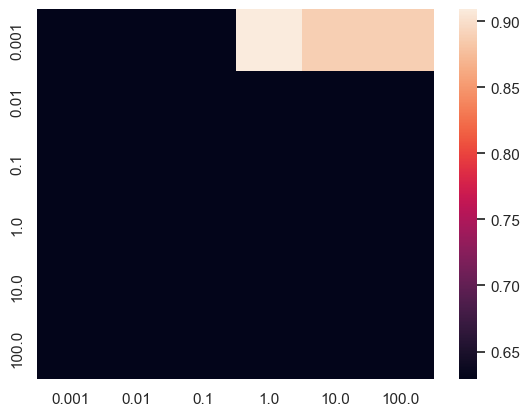

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=0)

#모든 하이퍼파라미터 조합으로 모델 구축 및 검증
scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)

#검증 결과를 scores에 저장
scores = pd.Series(scores)

print('최고 점수: {:.2f}'.format(scores.max()))
print('최고 점수에서의 하이퍼파라미터(gamma, C): {}'.format(scores.idxmax()))

#히트맵 출력, 세로축은 gamma, 가로축은 C
sns.heatmap(scores.unstack())

<p>&nbsp;</p>

__모듈의 함수를 사용한 그리드 서치 실행__

---

학습용 데이터를 `GridSearchCV` 클래스의 fit 메서드에 전달하는 부분에서 앞의 실습 코드와 달라진다.

이 부분부터 하이퍼파라미터를 조합한 여러 모델을 평가하고 가장 성능이 좋은 모델 구축까지 완료한다.

가장 좋은 하이퍼파라미터 조합과 모델 평가 점수는 모델의 속성 값에서 추출할 수 있다.

`GridSearchCV` 클래스의 `fit` 메서드를 실행하면 k-겹 교차검들보다 조금 개선된 방법을 이용한다. 따라서 `GridSearchCV` 클래스의 초기화 파라미터 `cv`는 5로 지정한다.

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C': np.logspace(-3, 2, num=6)
              , 'gamma': np.logspace(-3, 2, num=6)}

gs = GridSearchCV(estimator=SVC(),
                  param_grid=param_grid,
                  cv=5)

gs.fit(X_train, y_train)

print('Best cross validation score: {:.3f}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))
print('Test score: {:.3f}'.format(gs.score(X_test, y_test)))

Best cross validation score: 0.925
Best parameters: {'C': 1.0, 'gamma': 0.001}
Test score: 0.909


<p>&nbsp;</p>

__랜덤 서치(Random Search)__

---

그리드 서치는 딕셔너리에 지정한 모든 값을 다 탐색해야만 한다. 랜덤 서치는 랜덤하게 숫자를 넣은 뒤, 정해진 간격(grid)사이에 위치한 값들에 대해서도 확률적으로 탐색이 가능하므로, 최적 hyperparapmeter 값을 더 빨리 찾을 수 있다.

<p>&nbsp;</p>

__모델 튜닝: 특징 튜닝__

---

모델의 성능을 튜닝할 때 중요하게 고려하는 특징(feature)을 다루는 방법에 대한 두 개의 관점

> **1.** 학습부족(underfitting)

모델에 과적합은 발생하지 않지만 모델의 정확도도 낮을 때, 즉 모델의 일반화 성능이 좋지 않을 경우에는 일반적으로 특징(변수, 차원)을 늘이는 방법을 검토한다.

예를 들어 새로운 데이터를 수집해 새로운 특징을 추가하거나 특징 간의 비율을 계산해서 새로운 특징을 추가하는 방법을 모색한다.

이 밖에 데이터 수를 인위적으로 늘리는 오버샘플링이란 방법도 존재한다.

> **2.** 과학습(overfitting)

과적합이 의심되면 학습이 부족한 경우와는 반대로 특징을 줄이는 방법을 검토한다. 데이터 개수에 비해 특징의 수가 많으면 모델의 일반화 성능을 측정할 때 오차가 커진다. 이를 차원의 저주라고 한다.

특징의 수를 줄이는 것을 차원 감소(dimension reduction)라고 한다. 차원 감소는 두 가지로 분류된다.

하나는 특징의 부분 집합을 선택하는 특징선택(feature selection), 다른 하나는 원래의 특징 공간 축을 다른 공간 축으로 변환하는 특징추출(feature extraction)이다.

데이터에서 특징을 추출, 생성, 변환하는 방법을 피처 엔지니어링(feature engineering)이라고 하며, 차원 감소 방식 중에서 모델에 대한 해석이 중요한 경우 특징추출은 원래의 특징들을 조합해 변환하므로 어떤 특징이 모델에 어떻게 영향을 미쳤는지 설명하기 어려운 반면에, 특징선택은 다수의 특징 중에서 일부만 선택해 특징 개수를 줄이므로 어떤 특징이 모델 결과에 영향을 미치는지 설명하기 쉽다. 따라서, 일반적으로 특징선택을 이용하는 편이 좋다. 


<p>&nbsp;</p>

__분류 모델 평가: 오차행렬과 연관 지표__

---

오차행렬(confusion matrix)은 분류 모델을 평가할 때 사용하는데 모델의 예측값과 실젯값의 관계를 나타낸다.

<table>
  <tr>
    <td></td>
    <td>Predicted Positive</td>
    <td>Predicted Negative</td>
  </tr>
  <tr>
    <td>Actual Positive</td>
    <td>True Positive (TP)</td>
    <td>False Negative (FN)</td>
  </tr>
  <tr>
    <td>Actual Negative</td>
    <td>False Positive (FP)</td>
    <td>True Negative (TN)</td>
  </tr>
</table>



In [33]:
model = SVC(gamma=0.001, C=1)
model.fit(X_train, y_train)

print('{} train score: {:.3f}'.format(model.__class__.__name__, model.score(X_train, y_train)))
print('{} test score: {:.3f}'.format(model.__class__.__name__, model.score(X_test, y_test)))

SVC train score: 0.981
SVC test score: 0.909


In [34]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print('Confusioon matrix:\n{}'.format(m))

Confusioon matrix:
[[49  4]
 [ 9 81]]


<table>
  <tr>
    <td></td>
    <td>Predicted Negative</td>
    <td>Predicted Positive</td>
  </tr>
  <tr>
    <td style="text-align: center;">Actual Negative</td>
    <td style="text-align: center;">48</td>
    <td style="text-align: center;">5</td>
  </tr>
  <tr>
    <td>Actual positive</td>
    <td style="text-align: center;">8</td>
    <td style="text-align: center;">82</td>
  </tr>
</table>


<p>&nbsp;</p>

__모델 성능 평가 지표__

---

모델의 성능을 다양한 평가지표를 이용해 측정할 수 있다.

**분류 모델의 평가 지표**

> **1.** 정확도(Accuracy)

거짓으로 예측하고 실젯값도 거짓인 데이터 개수(48), 진실로 예측하고 실젯값도 진실인 데이터 개수(82)의 합계를 행렬 전체의 데이터 개수(143)로 나눈 값이다.

전체적으로 얼마나 정확하게 예측했는지 나타내는 지표가 정확도이다.

In [35]:
accuracy = (m[0, 0] + m[1, 1]) / m.sum()
print('정확도: {:.3f}'.format(accuracy))

정확도: 0.909


> **2.** 정밀도(precision)

정밀도는 진실로 예측한 값(82) 중에서 실젯값(87)도 진실인 비율이다.

In [36]:
from sklearn.metrics import precision_score

print('precision: {:.3f}'.format(precision_score(y_test, y_pred)))

precision = (m[1, 1])/m[:, 1].sum()

print('정밀도: {:.3f}'.format(precision))

precision: 0.953
정밀도: 0.953


> **3.** 재현도(recall)

재현도는 실제값이 진실인 데이터(90) 중에서 올바르게 진실(82)로 예측된 비율이다.

In [37]:
from sklearn.metrics import recall_score

print('recall: {:.3f}'.format(recall_score(y_test, y_pred)))

recall = (m[1, 1])/m[1, :].sum()

print('재현도: {:.3f}'.format(recall))

recall: 0.900
재현도: 0.900



> **4.** F1 점수(F1-measure)

F1 점수는 정밀도와 재현도의 조화 평균이다. 정밀도와 재현도 중 무엇이 더 중요한지 결정하지 않은 시점에서 모델을 종합적으로 평가하는 경우에 사용된다

조화평균은 통계학에서 사용되는 세 가지 평균 값 중 하나로, 주어진 데이터 집합의 역수의 평균을 계산한다. 즉, 주어진 값들을 역수로 변환한 후에 이 값들의 산술평균을 구한다.

일반적인 조화평균은 n개의 양의 실수 x1, x2, ..., xn의 역수의 합을 n으로 나눈 것으로 정의된다.

$H = n/(1/x1 + 1/x2 + ... + 1/xn)$

하지만 F1 점수는 정밀도와 재현율의 값의 조화 평균을 사용하여 이진 분류 작업에서 정밀도와 재현율의 중요성을 균형 있게 고려하기 위해

$F1 = 2*(정밀도*재현도)/(정밀도+재현도)$

로 정의된다.

In [38]:
from sklearn.metrics import f1_score

print('F1-measure: {:.3f}'.format(f1_score(y_test, y_pred)))

f1 = 2 * (precision * recall)/(precision + recall)

print('F1 값: {:.3f}'.format(f1))

F1-measure: 0.926
F1 값: 0.926



> **5.** AUC(Area Under Curve)

오차행렬은 예측 결과가 긍정과 부정으로 분류되었다는 것을 전제로 한다. 그러나 모델을 평가하는 시점에서 분석가가 예측값을 긍정인지 부정인지 판단하기 위한 적절한 임곗값(보통은 확률 0.5를 기준으로 설정함)을 결정하지 못한 경우도 있다.

분류 모델이 출력하는 예측 확률값과 실젯값(1 또는 0)과의 관계를 이용해 모델의 성능을 평가할 때 ROC 곡석과 AUC를 활용한다.

_ROC 곡선_

ROC 곡선은 세로축에 진양성률(true positive rate, tpr), 가로축에 위양성률(false positive rate  rate, fpr) 값을 표시하는 곡선이다.

진양성률은 실제 긍정값 개수와 긍정값으로 예측된 개수의 비율(재현도와 동일)이고, 위양성율은 실제 부정값 개수와 부정값으로 예측된 개수의 비율이다.

예측 확률 수치를 예측 레이블(긍정 또는 부정)로 변환할 때의 임곗값(기준값)을 0.0과 1.0 사이에서 조금씩 변화시키고 진양성률과 위양성율의 관계를 그래프로 그린 것이 ROC곡선이다.

<p>&nbsp;</p>

__예측 확률을 임곗값을 기준으로 나누고 예측 레이블 생성__

---

로지스틱회귀 모델을 구축하는 `LogisticRegression` 클래스의 `predict_proba` 메서드를 이용해 암이 악성인지(malignant: 0) 양성인지(benign: 1) 예측하는 확률을 계산한다.

`predict_proba` 메서드의 출력받은 0 또는 1과 같은 레이블이 아니라 각 범주(레이블)로 분류될 확률값 배열이다.

여기에서는 악성(malignant: 0)을 긍정값, 양성(benign: 1)를 부정값으로 생각한다.

In [39]:
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify= cancer.target,
                                                    random_state=66)

model = LogisticRegression(random_state= 0, solver='liblinear')
model.fit(X_train, y_train)

results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)

results.head()

,malignant,benign
0,0.003751,0.996249
1,0.000525,0.999475
2,0.027682,0.972318
3,0.007184,0.992816
4,0.003221,0.996779


예측 확률값을기준으로 예측 레이블을 분류(malignant: 0, benign: 1)할 때 단순하게 50%(0.5)를 기준(임곗값)으로 판단할 수도 있지만 실제로는 모델의 사용 목적, 긍정값의 자연 발생률 등을 고려해 임곗값을 설정한다.

임곗값을 바꾸면 당연히 긍정값으로 예측되는 데이터 개수도 바뀌므로, 정확도, 정밀도, 재현도도 달라진다.

임곗값을 4개의 값 0.4, 0.3, 0.15, 0.05로 설정하여 양성 예측 확룰이 임곗값을 초과하면 1, 그렇지 않으면 0이 할당되는 변수를 만든다.

In [40]:
#양성(benign) 범주 예측 확률이 0.4, 0.3, 0.15, 0.05 일 때 각 칼럼(변수)에 1을 지정
threshold = [0.4, 0.3, 0.15, 0.05]

for i in threshold:
    results[f'flag_{i}'] = results['benign'].map(lambda x: 1 if x > i else 0)

results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.003751,0.996249,1,1,1,1
1,0.000525,0.999475,1,1,1,1
2,0.027682,0.972318,1,1,1,1
3,0.007184,0.992816,1,1,1,1
4,0.003221,0.996779,1,1,1,1
5,0.008860,0.991140,1,1,1,1
6,0.006006,0.993994,1,1,1,1
7,0.003219,0.996781,1,1,1,1
8,0.917958,0.082042,0,0,0,1
9,0.817307,0.182693,0,0,1,1


이와 같이 예측 확률과 임곗값을 이용해 예측 결과 변수를 생성하면 실젯값과의 오차행렬표를 만들어 위양성률과 진양성률을(임곗값별로) 계산할 수 있다.

<p>&nbsp;</p>

__ROC 곡선 그래프 그리기__

---

4개의 임곗값만으로는 ROC 곡선의 일부만 표현할 수 있다. 아래 코드는 임곗값을 0.01 ~ 0.99 사이에서 50개 만들어 위양성 비율과 진양성 비율을 그래프로 나타낸다.

<Axes: xlabel='false positive rate', ylabel='true positive rate'>

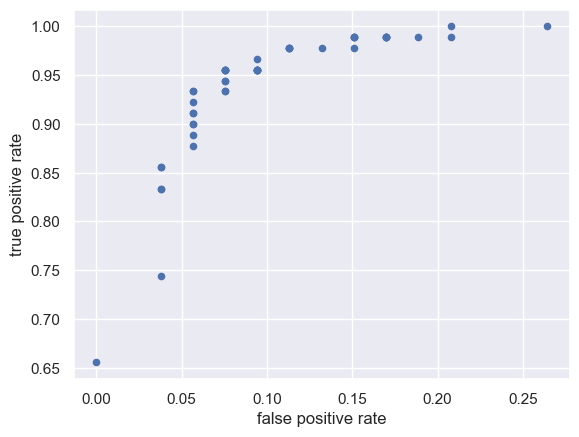

In [41]:
#임곗값을 0.01 ~ 0.99 사이에서 50개를 만들고 위양성 비율과 진양성 비율 계산
#labels로 얻은 결과가 앞에서 확인한 예측 결과 변수

rates = {}
for threshold in np.linspace(0.01, 0.99, num= 50):
    labels = results['benign'].map(lambda x: 1 if x > threshold else 0)
    m = confusion_matrix(y_test, labels)
    rates[threshold] = {'false positive rate': m[0, 1] / m[0, :].sum(),
                        'true positive rate': m[1, 1] / m[1, :].sum()}
    
# 가로축은 false positive rate, 세로축은 true positive rate로 그래프 그리기
pd.DataFrame(rates).T.plot.scatter('false positive rate', 'true positive rate')

<p>&nbsp;</p>

__ROC 곡선과 AUC__

---

예측확률(`y_pred`)을 구하면 실젯값(`y_test`)과 함께 `sklearn.metrics` 모듈 `roc_curve` 함수에 전달한다. 그러면 위양성 비율(`fpr`)과 진양성 비율(`tpr`)을 나타내는 배열을 반환값으로 얻어 그래프를 그린다.

In [42]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.5, random_state=66)

model = svm.SVC(kernel='linear', probability=True, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]

_AUC 계산_

AUC는 `sklearn.metrics` 모둘 `auc` 함수에 `fpr`과 `tpr`을 순서대로 전달하고 계산한다.

ROC 곡선은 AUC 계산에 사용한 `fpr`과 `tpr` 배열을 사용해 그린다. 실선 아래의 면적이 AUC이다. 50%의 확률로 무작위로 예측할 때의 ROC 곡선(점선)도 함께 나타낸다.

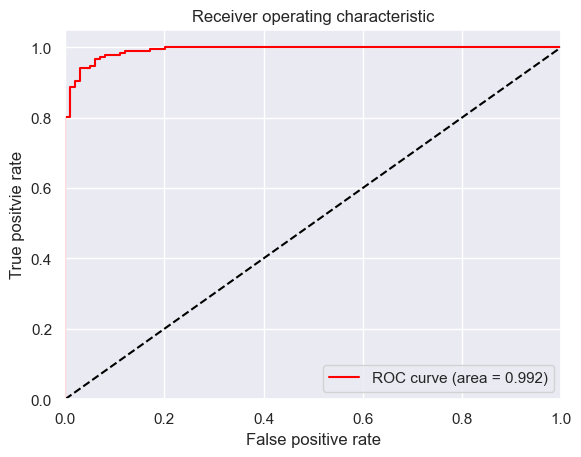

In [43]:
# 위양성 비율과 진양성 비율 계산
fpr, tpr, threshold = roc_curve(y_test, y_pred)

# AUC 산출
auc = auc(fpr, tpr)

# ROC 곡선 그리기

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positvie rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

_이상적인 ROC 곡선과 AUC_

ROC 곡선은 임곗값을 (1.0 이상의 값에서) 서서히 감소시켰을 때 원점에서 진양성 비율만 증가하는 형태가 이상적이다. 즉, 원점에서 좌표 (0, 1) 방향으로 수직이동 후 좌표 (1, 1) 방향으로 수평 이동하는 모양이다.

반대로 예측 확률이 무작위적이라면 진양성 비율과 위양성 비율도 함께 증가할 것이므로 ROC 곡선은 원점을 지나는 기울기 1인 직선이 된다.

머신러닝으로 구축된 모델은 일반적으로 무작위 확률의 경우와 이상적인 곡선 사이에 그려지며 왼쪽 위로 더 부풀어 오른 곡선 모양이 된다.

AUC는 ROC 곡선의 모양에 기반한 모델 평가 지표로서 ROC 곡선과 가로축으로 둘러싸인 그래프의 면적이다. AUC는 이상적인 곡선에서 1.0, 예측 확률이 무작위일 때는 0.5이다.

오차행렬의 작성, ROC 곡선의 형태 비교 그리고 정밀도, 재현율, F1 점수, AUC 크기 비교는 모델을 선택할 때 기초적인 근거가 된다. 단, 그러한 지표들은 선택할 수 있는 여러 모델 사이에서 어떤 모델이 더 우수한지 수치적으로 비교해 줄 뿐 모델 선택의 절대적인 기준은 아니다. 따라서 머신러닝 모델을 이용해 얻어야 하는 비즈니스 성과와 목적이 무엇인지 이해하고 모델을 선택해야 하며 단순히 지표만 보고 판단하지 않도록 유의해야 한다.

_불균형 데이터일 때 AUC를 활용하는 방법_
  
임곗값이 불명확한 단계에서는 오차행렬표를 만들 수 없지만 AUC는 불균형 데이터(imbalanced data)에도 활용할 수 있다.

예를 들어 슈퍼마켓에서 A 상품을 사는 사람이 전체 고객의 5%라고 한다. 예측 모델은 예측 확률이 높은 상위 5명이 A 상품을 구매할 것으로 예측했지만 실제로는 상위 5명(예측 변수 값이 1)이 구매하지 않았을 때 오차행렬표는 다음과 같다.

<table>
  <tr>
    <td></td>
    <td>Predicted Negative</td>
    <td>Predicted Positive</td>
  </tr>
  <tr>
    <td style="text-align: center;">Actual Negative</td>
    <td style="text-align: center;">90</td>
    <td style="text-align: center;">5</td>
  </tr>
  <tr>
    <td>Actual positive</td>
    <td style="text-align: center;">5</td>
    <td style="text-align: center;">0</td>
  </tr>
</table>

이 경우 정밀도는 0%이지만 정확도는 90%이다. 모델의 성능을 정확도로만 평가하면 위의 모델을 좋아 보인다. 그러나 예측하려는 사람은 비구매자가 아니라 구매자인데 정밀도가 0%이면 의미 없는 모델이다.

'구매자가 5명, 비구매자가 95명' 같이 각 범주에 해당하는 샘플 데이터 개수가 불균형한 상황에서 정확도는 적절한 지표가 아니다. 반면 AUC는 각 범주의 데이터 개수가 fpr(위양성비율)과 tpr(진양성비율)의 분모가 되어 데이터 개수 편차가 제거된다. 즉, AUC는 불균형 데이터를 이용해 구축한 모델 평가에도 활용할 수 있는 지표이다.

<p>&nbsp;</p>

__회귀 모델 평가지표__

---

회귀 모델은 훈련 데이터의 목표변수가 주가나 물건 가격과 같이 수치이므로 비교적 직관적인 지표를 이용해 모델을 평가할 수 있다.

> **1.** 평균제곱오차(Mean Squared Error, MSE)

$$
MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \bar{y})^2
$$


예측값과 실젯값의 차이(잔차) 제곱을 개별 데이터마다 더한 값을 잔차제곱합(sum of squared error, SSE)이라고 한다. 이 값을 데이터 개수로 나눈 거이 평균제곱오차(MSE)이다. MSE는 간단한고 이해하기 쉬워서 다양한 알고리즘의 성능 평가에 사용된다.

> **2.** 평균절대오차(Mean Absolute Error, MAE)

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \bar{y} \right|
$$

잔차의 절댓값을 모두 더하고 데이터 개수로 나눈 값이 평균절대오차(MAE)이다. MSE와 비교하면 잔차가 제곱되지 않은 만큼 예측에서 벗어난 값의 영향을 덜 받는 특징이 있다.

> **3.** Median Absolute Error(MedAE)

$$
MedAE = \text{median}\left( \left| y_i - \bar{y} \right| \right)
$$

잔차 절댓값들의 중앙값이 MedAE이다. MAE보다 예측에서 벗어난 값의 영향을 덜 받는 강건한 평가지표이다.

> **4.** 결정계수($R^2$)

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$


결정계수는 테스트 데이터의 평균값으로 각 데이터를 예측했을 때의 잔차제곱합(sum of squared total, $SS_{\text{tot}}$)과 예측 모델의 잔차제곱합(sum of squared errors, $SS_{\text{res}}$)의 비율이며 $R^2 = 1 - SS_{\text{res}}/SS_{\text{tot}}$로 정의된다. 평균값으로 예측하는 경우에 비해 제곱오차를 얼마나 감소시키는지 나타내는 지표이다. 오차가 모두 없어지면 1.0, 평균으로 예측할 때와 동읠하면 0.0이다. 일반적으로 0~1 사이의 값을 가지지만 음수가 될 수 있다.

In [44]:
from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()

X = pd.DataFrame(cali_housing.data, columns=cali_housing.feature_names)

y = pd.Series(cali_housing.target, name='MEDV')

X.join(y).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=0),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    'LinearSVR': LinearSVR(C=0.1, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'MSE')] = mean_squared_error(y_test, model.predict(X_test))
    scores[(model_name, 'MAE')] = mean_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'MedAE')] = median_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'R2')] = r2_score(y_test, model.predict(X_test))

pd.Series(scores).unstack()

,MAE,MSE,MedAE,R2
DecisionTreeRegressor,0.486836,0.563154,0.289500,0.579518
LinearRegression,0.533041,0.534010,0.414231,0.601279
LinearSVR,0.518359,3.264599,0.342224,-1.437528
Ridge,0.533038,0.534025,0.414267,0.601268


<p>&nbsp;</p>

__앙상블 학습(ensemble learning)__

---

앙상블 학습을 활용하면 개별 알고리즘을 튜닝하는 정도로는 넘어설 수 없는 성능에 도달할 수도 있다. 정밀도가 중요한 상황에서는 앙상블 학습이 하나의 중요한 선택지가 될 수 있다.

> **1.** 배깅(bootstrap aggregating, bagging)

배깅은 훈련 데이터(n행)에서 임의의 n행 데이터를 복원 추출(중복추출)해 새로운 휸련 데이터를 반복적으로 생성하고(부트스트랩), 반복해서 꺼낸 각 데이터세트를 이용해 하나하나 모델을 만든 뒤, 이 모델들의 결과를 결합해 예측하는 방법이다.

각 모델의 결과를 결합한다는 말은 분류 모델에서는 다수결, 회귀 모델에서는 결과의 평균을 계산한다는 의미이다.

원본 훈련 데이터와는 조금씩 다른 훈련 데이터로 모델을 구축하기 때문에 모델이 과적합되는 경향이 있을 때 배깅을 이용해 일반화 성능을 향상시킬 수 있다.


In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify= cancer.target, random_state=82
)

models = {
    'KNN': KNeighborsClassifier(),
    'bagging': BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=0)    
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test_score,train_score
KNN,0.916084,0.943662
bagging,0.923077,0.943662


위 예제에서는 인수 `n_estimator`을 100으로 지정하고 배깅으로 k-NN 모델 100개를 만든다. 훈련 데이터 점수는 거의 동일하지만 테스트 데이터 점수는 상승하는 것을 확인할 수 있다.

`BaggingClassifier` 클래스에는 `max_samples`(기본값은 1.0), `max_features`(기본값은 1.0) 파라미터가 있다. 전자는 부트스트랩할 때 원본 데이터에서 몇 %를 추출할지 지정한다. 0.5면 모든 변수 중 절반을 이용해 모델을 만든다.

모델에 과적합이 발생한다면 원본 데이터를 일부만 사용하거나 복원 추출된 샘플 데이터별로 다른 설명변수를 사용하면 과적합을 방지하는 데 효과적일 수 있다.


> **2.** 부스팅(boosting)

배깅은 부트스트랩으로 추출된 복수의 샘플 데이터를 이용해 여러 모델을 구축한다. 반면, 부스팅(boosting)은 훈련 데이터와 모델이 순차적으로 생성되고 구축된다.

원본 학습 데이터를 이용해 첫 번째 모델을 구축한다. 이 모델로 예측값과 실젯값을 비교해 예측이 들어맞는 샘플과 잘못 예측된 샘플 데이터를 파악한다. 그 다음 모델 구축 단계에서는 잘못 예측되었던 샘플 데이터가 학습 데이터로 추출될 확률이 더 높도록 조정하고 새로운 학습 데이터를 생성한다.

이러한 과정을 반복하며 순차적으로 여러 개의 모델을 구축한다.

최종적으로 여러 모델의 예측밧을 조합해 모델의 일반화 성능을 향상시킨다. 부스팅은 학습이 부족한(underfitting) 모델일 때 효과적인 방법으로 알려져 있다.

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

cali_housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(
    cali_housing.data, cali_housing.target, random_state=82
)

models = {
    'tree': DecisionTreeRegressor(random_state=0),
    'AdaBoost': AdaBoostRegressor(DecisionTreeRegressor(), random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test_score,train_score
AdaBoost,0.819495,0.999378
tree,0.600398,1.000000


의사결정 나무 모델만 사용했을 때 보다 `AdaBoostRegressor` 클래스를 사용한 앙상블 학습에서는 테스트 데이터 점수가 크게 증가했다.

앙상블 학습은 정밀도가 중요한 상황에서 매우 강력한 선택지이지만 다소 과적합되는 경향이 있다는 점에 유의해야한다.

<p>&nbsp;</p>

__랜덤 포레스트(Random Forest), 그레이디언트 부스팅(Gradient Boosting)__

---

> **1.** 랜덤 포레스트(Random Forest)

> **2.** 그레이디언트 부스팅 (Gradient Boosting)

In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

cali_housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(
    cali_housing.data, cali_housing.target, random_state=666
) 

models = {
    'RandomForest' : RandomForestRegressor(random_state=0),
    'GradientBoost': GradientBoostingRegressor(random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.782677,0.80854
RandomForest,0.804717,0.97320


<p>&nbsp;</p>

__변수 중요도(Feature Importance)__

---

변수 중요도는 각각의 입력 변수 또는 특성(feature)이 모델의 예측에 얼마나 중요한 역할을 하는지를 평가하는 방법이다.

Feature importance를 평가함으로서 어떤 특성이 예측에 가장 큰 영향을 주는지를 파악할 수 있다.

_feautre importacne 계산 방법_


> **1.** 회귀 분석

회귀 문제의 경우, 특성의 계수(coefficient)나 가중치(weight)를 사용하여 feature importance를 계산한다. 이는 특성의 값이 예측에 얼마나영향을 미치는지를 나타낸다.

선형 회귀 모델이나 릿지 회귀 모델과 같은 일부 알고리즘은 이러한 계수를 제공한다.

> **2.** 의사 결정 트리

결정 트리 기반 모델에서는 특성의 중요도를 계산할 수 있습니다. 결정 트리는 특성들을 이용하여 데이터를 분할하고 예측을 수행하는 모델입니다. 특성들의 분할 기준과 순서에 따라 각 특성의 중요도를 측정할 수 있습니다. 특성의 중요도는 정보 이득(Information Gain)이나 지니 불순도(Gini Impurity) 등과 연관지어 계산될 수 있습니다.

> **3.** 앙상블

랜덤 포레스트(Random Forest)나 그래디언트 부스팅(Gradient Boosting)과 같은 앙상블 모델에서는 다수의 결정 트리를 조합하여 예측을 수행합니다. 이러한 모델들은 각 특성의 중요도를 계산하여 특성 선택에 활용할 수 있습니다.

> **4.**  순열 특성 중요도 (Permutation Feature Importance)

Permutation Importance는 특성의 중요도를 평가하는 또 다른 방법입니다. 이 방법은 특성의 값들을 무작위로 섞어서 특성과 실제 결과 사이의 관계를 없애고 모델의 성능 변화를 측정하는 방식으로 동작합니다. 특성의 순서를 무작위로 섞으면 해당 특성이 모델에 얼마나 영향을 미치는지 알 수 있습니다.

모델의 값을 섞을 때 모델이 예측에 대해 특성이 무관한 경우 "중요하지 않음"이 된다.

<Axes: >

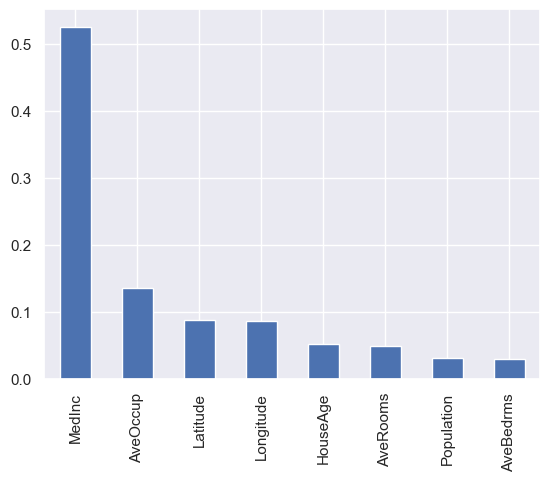

In [49]:
s = pd.Series(models['RandomForest'].feature_importances_,
              index=cali_housing.feature_names)

s.sort_values(ascending=False).plot.bar(color='C0')